In [1]:
import pandas as pd
import numpy as np

In [2]:
date_format = '%d.%m.%y %H:%M'

for i in range(1, 29):
    file_path = 'data/raw/subjectID_' + str(i) + '.csv'
    df = pd.read_csv(file_path)
    # if there is an acitivity class column, drop it
    if 'ActivityClass' in df.columns:
        df = df.drop(['ActivityClass'], axis=1)
    # if there is a galvanic skin response column, drop it
    if 'GalvanicSkinResponse' in df.columns:
        df = df.drop(['GalvanicSkinResponse'], axis=1)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format=date_format)
    print('subjectID_' + str(i) + ':')
    print('The number of weeks that the Timestamp column spans:')
    print(df['Timestamp'].max() - df['Timestamp'].min())
    print('The number of rows with missing values, and their percentage of the total number of rows:')
    print(df.isnull().sum() / df.shape[0] * 100)
    print('\n')


subjectID_1:
The number of weeks that the Timestamp column spans:
6 days 22:25:00
The number of rows with missing values, and their percentage of the total number of rows:
Timestamp             0.000000
ActivityCounts        5.998398
Barometer             5.998398
BloodPerfusion        6.429001
BloodPulseWave        6.429001
EnergyExpenditure     5.998398
HR                    6.429001
HRV                  21.299820
RESP                 10.294412
Steps                 5.998398
SkinTemperature       5.998398
dtype: float64


subjectID_2:
The number of weeks that the Timestamp column spans:
0 days 02:41:00
The number of rows with missing values, and their percentage of the total number of rows:
Timestamp            0.000000
ActivityCounts       0.000000
Barometer            0.000000
BloodPerfusion       0.000000
BloodPulseWave       0.000000
EnergyExpenditure    0.000000
HR                   0.000000
HRV                  8.641975
RESP                 4.320988
Steps                0.00000

Pilot study with one sample

In [12]:
file_path = 'data/raw/subjectID_24.csv'
df24 = pd.read_csv(file_path)
# create a new data frame that contains the 10 minute average of each column
df24['Timestamp'] = pd.to_datetime(df24['Timestamp'], format=date_format)
df24 = df24.drop(columns=['ActivityClass', 'GalvanicSkinResponse'])
df24 = df24.set_index('Timestamp')
df24 = df24.resample('10T').mean()  # '10T' stands for 10 minutes
df24 = df24.reset_index()
df24


,Timestamp,ActivityCounts,Barometer,BloodPerfusion,BloodPulseWave,EnergyExpenditure,HR,HRV,RESP,Steps,SkinTemperature
0,2017-12-31 23:50:00,0.784314,976.400,1.565000,2.220000,292.000000,59.119471,34.123656,14.033886,0.0,34.7050
1,2018-01-01 00:00:00,1.137255,976.590,1.507000,2.268000,1094.500000,64.612757,39.131446,15.095639,0.0,35.5100
2,2018-01-01 00:10:00,2.156863,976.825,1.573500,3.115000,2214.200000,79.336830,44.155000,15.617629,0.0,35.1290
3,2018-01-01 00:20:00,0.784314,977.665,2.194000,2.087000,987.600000,59.600539,33.379380,16.030386,0.0,34.2690
4,2018-01-01 00:30:00,1.098039,977.865,2.156000,1.707000,960.000000,57.543399,34.909026,16.848911,0.0,33.9260
...,...,...,...,...,...,...,...,...,...,...,...
31058,2018-08-04 16:10:00,0.784314,982.970,0.738500,1.781000,1328.777501,47.667828,33.644959,14.445243,0.0,35.6050
31059,2018-08-04 16:20:00,0.784314,982.900,0.716000,1.738000,1330.995827,46.930095,35.539895,14.197552,0.0,35.3695
31060,2018-08-04 16:30:00,0.784314,982.805,0.551000,1.625000,1330.995827,48.638104,39.913934,13.815729,0.0,35.5805
31061,2018-08-04 16:40:00,0.823529,982.805,0.517500,1.649000,1330.995827,48.340401,42.712141,12.833625,0.0,35.8590


In [13]:
fatiguePROs = pd.read_csv('data/fatiguePROs_processed.csv')
subject24_labels = fatiguePROs[fatiguePROs['SubjectID'] == 24]
subject24_labels.reset_index(drop=True, inplace=True)
# convert the Timestamp column to datetime type
subject24_labels['DateTime'] = pd.to_datetime(subject24_labels['DateTime'], format=date_format)
# find all timestamp that have missing values in the proanswers column
missing_proanswers = subject24_labels[subject24_labels['PROanswer_value'].isnull()].DateTime.unique()
# drop all rows that have the above timestamps
subject24_labels = subject24_labels[~subject24_labels['DateTime'].isin(missing_proanswers)]
subject24_labels.reset_index(drop=True, inplace=True)
subject24_labels


/tmp/ipykernel_1280809/384756979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject24_labels['DateTime'] = pd.to_datetime(subject24_labels['DateTime'], format=date_format)


,SubjectID,DateTime,Timezone,question,PROanswer_value
0,24,2017-12-13 21:00:00,CET,VAS,7.0
1,24,2017-12-13 21:00:00,CET,RelP,-1.0
2,24,2017-12-13 21:00:00,CET,PhF,2.0
3,24,2017-12-13 21:00:00,CET,MF,3.0
4,24,2017-12-14 21:00:00,CET,VAS,6.0
...,...,...,...,...,...
519,24,2018-08-03 20:00:00,CEST,MF,1.0
520,24,2018-08-04 20:01:00,CEST,VAS,3.0
521,24,2018-08-04 20:01:00,CEST,RelP,0.0
522,24,2018-08-04 20:01:00,CEST,PhF,0.0


In [14]:
unique_date_time = subject24_labels['DateTime'].unique()

# for each unique DateTime in subject24_labels, find the segment of df24 that are three days before the DateTime to the DateTime
# and append the segment to a new data frame
df24_3days = []
PROlabels_PhF = []
PROlabels_MF = []
PROlabels_VAS = []
PROlabels_RelP = []

for i in range(len(unique_date_time)):
    #  find the date of unique_date_time[i]

    start_date_time = max(unique_date_time[i] - pd.Timedelta(days=5), df24['Timestamp'].min())
    end_date_time = unique_date_time[i]
    
    segment = df24[(df24['Timestamp'] > start_date_time) & (df24['Timestamp'] <= end_date_time)]
    # remove the timestamp column
    segment = segment.drop(columns=['Timestamp'])
    # if >=80% of the values in the segment are not NaN or None, append the segment to a new data frame
    if segment.size >0 and segment.notnull().sum().sum() / segment.size >= 0.8:
        segment = segment.to_numpy()
        print(segment.size)
        df24_3days.append(segment)
        # find the PROlabel that corresponds to the DateTime, append it to PROlabels
        PROlabel = subject24_labels[subject24_labels['DateTime'] == end_date_time]
        PROlabels_PhF.append(PROlabel[PROlabel['question'] == 'PhF'].PROanswer_value.values[0])
        PROlabels_MF.append(PROlabel[PROlabel['question'] == 'MF'].PROanswer_value.values[0])
        PROlabels_VAS.append(PROlabel[PROlabel['question'] == 'VAS'].PROanswer_value.values[0])
        PROlabels_RelP.append(PROlabel[PROlabel['question'] == 'RelP'].PROanswer_value.values[0])
df24_3days


1270
2710
4150
5590
7030
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7010


[array([[1.13725490e+00, 9.76590000e+02, 1.50700000e+00, ...,
         1.50956390e+01, 0.00000000e+00, 3.55100000e+01],
        [2.15686274e+00, 9.76825000e+02, 1.57350000e+00, ...,
         1.56176293e+01, 0.00000000e+00, 3.51290000e+01],
        [7.84313725e-01, 9.77665000e+02, 2.19400000e+00, ...,
         1.60303862e+01, 0.00000000e+00, 3.42690000e+01],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]),
 array([[1.13725490e+00, 9.76590000e+02, 1.50700000e+00, ...,
         1.50956390e+01, 0.00000000e+00, 3.55100000e+01],
        [2.15686274e+00, 9.76825000e+02, 1.57350000e+00, ...,
         1.56176293e+01, 0.00000000e+00, 3.51290000e+01],
        [7.84313725e-01, 

In [19]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming your data is stored in 'data' and labels in 'labels'
X_train, X_test, y_train, y_test = train_test_split(df24_3days, PROlabels_VAS, test_size=0.2, random_state=42)

from torch.nn.utils.rnn import pad_sequence
# Pad sequences with zeros
X_train = pad_sequence([torch.tensor(seq, dtype=torch.float32) for seq in X_train], batch_first=True, padding_value=float('nan'))
X_test = pad_sequence([torch.tensor(seq, dtype=torch.float32) for seq in X_test], batch_first=True, padding_value=float('nan'))
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_train = torch.nan_to_num(X_train)
X_test = torch.nan_to_num(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


(torch.Size([56, 720, 10]),
 torch.Size([56]),
 torch.Size([14, 720, 10]),
 torch.Size([14]))

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# Define the LSTM model with consistency self-attention
class LSTMWithAttention(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, consistency_attention_size):
        super(LSTMWithAttention, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.consistency_attention = nn.Linear(hidden_size, consistency_attention_size)
        # self.fc = nn.Linear(hidden_size, output_size)
        self.fc = nn.Linear(hidden_size + consistency_attention_size, output_size)

        self.relu = nn.ReLU()
        
    def forward(self, x):
        out, _ = self.lstm(x)
        
        # Calculate consistency attention
        attention_weights = torch.softmax(self.relu(self.consistency_attention(out)), dim=-1)
        context = torch.sum(attention_weights * out, dim=1)
        
        # Concatenate LSTM output and attention context
        out = torch.cat((out[:, -1, :], context), dim=-1)
        
        # Fully connected layer
        out = self.fc(out)
        return out


# Instantiate the model
input_size = 10  # Adjust according to your data
hidden_size = 128
output_size = 1  # Assuming regression task
num_layers = 1
consistency_attention_size = 128
model = LSTMWithAttention(input_size, hidden_size, output_size, num_layers, consistency_attention_size)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs.squeeze(), y_test)
    print(f'Test Loss: {test_loss.item():.4f}')


Epoch [1/20], Loss: 21.3258
Epoch [2/20], Loss: 16.6345
Epoch [3/20], Loss: 12.7376
Epoch [4/20], Loss: 9.8642
Epoch [5/20], Loss: 7.1024
Epoch [6/20], Loss: 4.8033
Epoch [7/20], Loss: 3.2718
Epoch [8/20], Loss: 2.3047
Epoch [9/20], Loss: 1.9071
Epoch [10/20], Loss: 1.9839
Epoch [11/20], Loss: 2.2881
Epoch [12/20], Loss: 2.5693
Epoch [13/20], Loss: 2.6553
Epoch [14/20], Loss: 2.5749
Epoch [15/20], Loss: 2.4190
Epoch [16/20], Loss: 2.2142
Epoch [17/20], Loss: 2.0022
Epoch [18/20], Loss: 1.8080
Epoch [19/20], Loss: 1.6562
Epoch [20/20], Loss: 1.5622
Test Loss: 1.0184


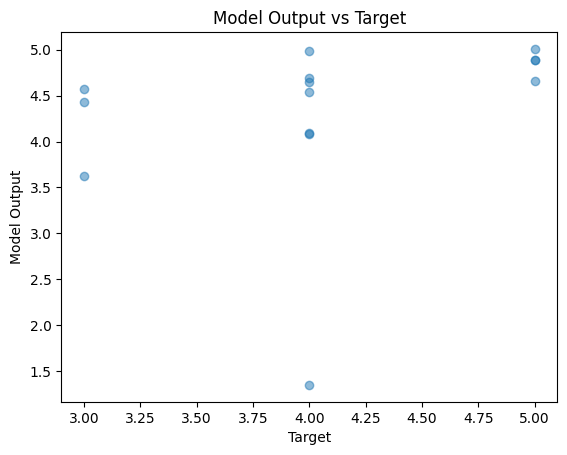

In [75]:
#plot the predicted and actual values
import matplotlib.pyplot as plt
# Convert torch tensors to numpy arrays for plotting
y_test_np = y_test.numpy()
test_outputs_np = test_outputs.numpy()

# Create a scatter plot
plt.scatter(y_test_np, test_outputs_np, alpha=0.5)
plt.title('Model Output vs Target')
plt.xlabel('Target')
plt.ylabel('Model Output')
plt.show()